In [1]:
import numpy as np                     
import pandas as pd   
import matplotlib.pyplot as plt           
from sklearn.model_selection import train_test_split   
from sklearn.linear_model import LinearRegression 
import statistics  
import seaborn as sns   
import warnings  
warnings.filterwarnings("ignore")

In [2]:
cars =pd.read_csv("./CarPrice_Assignment.csv") 


In [3]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
cars["companyname"]=cars["CarName"].str.split(" ",n=1).str[0]

In [6]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,companyname
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [7]:
cars.drop(["CarName"],axis=1,inplace=True)

In [8]:
cars.companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:
cars.companyname=cars.companyname.str.lower()
def replace_name(a,b): 
    cars.companyname.replace(a,b,inplace=True) 
replace_name('maxda',"mazda")
replace_name('porcshce',"porsche")
replace_name('toyouta',"toyota")
replace_name('vokswagen',"volkswagen")
replace_name('vw',"volkswagen")

In [10]:
cars.companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

VISUALIZING THE DATA

<Axes: title={'center': 'distribution on box plot'}>

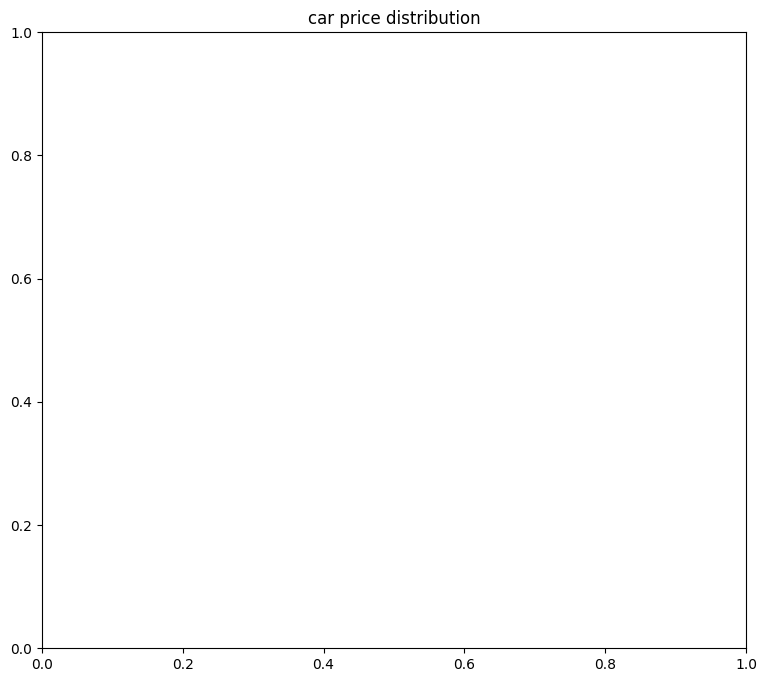

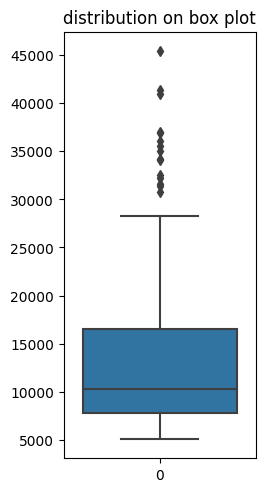

In [11]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1) 
plt.title("car price distribution") 
sns.displot(cars.price)

plt.subplot(1,2,2) 

plt.title("distribution on box plot")
sns.boxplot(cars.price)

In [12]:
cars.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,companyname
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


<Axes: title={'center': 'distribution of cars'}>

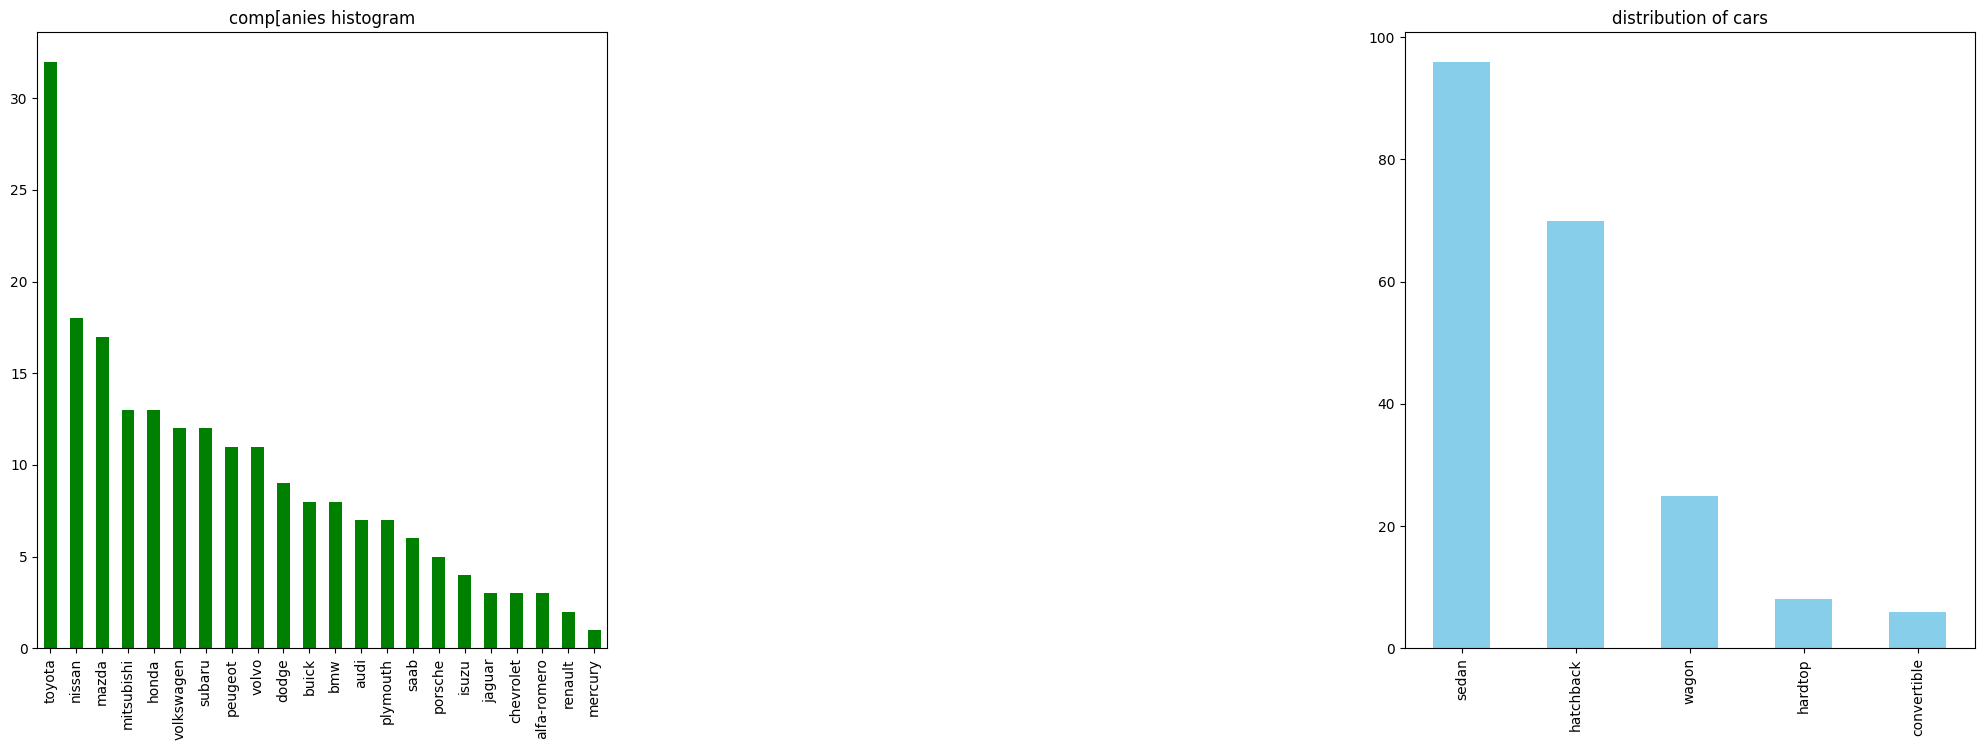

In [13]:
plt.figure(figsize=(25,8)) 


plt.subplot(1,3,1) 
plt.title("comp[anies histogram") 
cars.companyname.value_counts().plot(kind="bar" , color="green")


plt.subplot(1,2,2) 
plt.title("fully dsist") 
cars.fueltype.value_counts().plot(kind="bar",color="pink")


plt.subplot(1,3,3) 
plt.title("distribution of cars") 
cars.carbody.value_counts().plot(kind="bar",color="skyblue")

<Axes: title={'center': 'symboling vs price'}, xlabel='symboling', ylabel='price'>

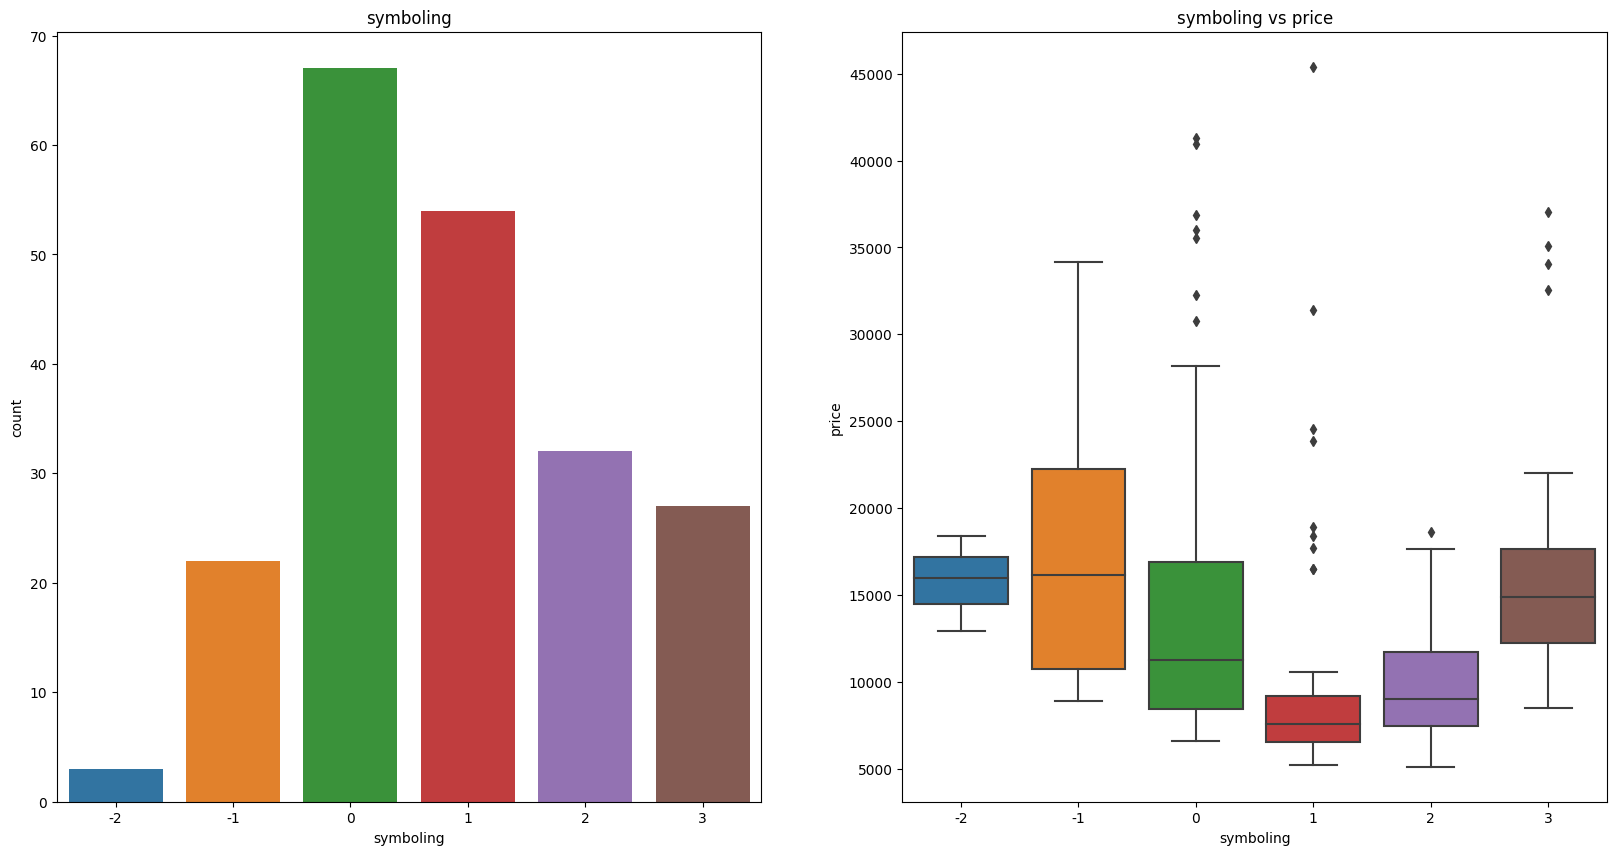

In [14]:
plt.figure(figsize=(20,10)) 

plt.subplot(1,2,1) 
plt.title("symboling") 
sns.countplot(x=cars.symboling) 

plt.subplot(1,2,2) 
plt.title("symboling vs price") 
sns.boxplot(x=cars.symboling,y=cars.price)





<Axes: title={'center': 'enginetype vs price'}, xlabel='enginetype', ylabel='price'>

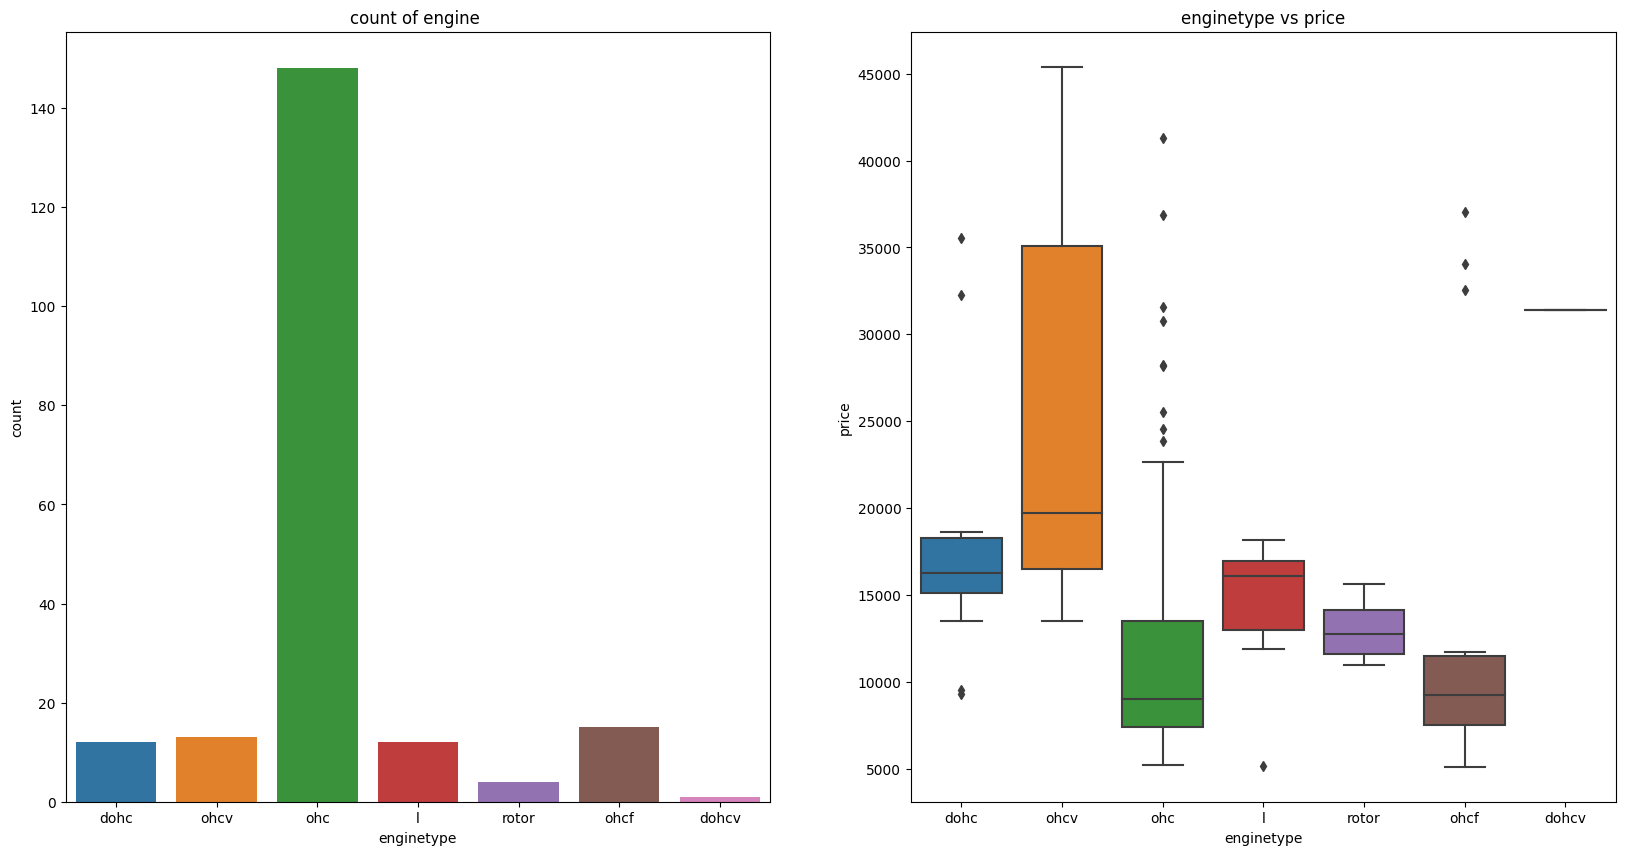

In [15]:
plt.figure(figsize=(20,10)) 

plt.subplot(1,2,1) 
plt.title("count of engine ") 
sns.countplot(x=cars.enginetype) 

plt.subplot(1,2,2) 
plt.title("enginetype vs price") 
sns.boxplot(x=cars.enginetype,y=cars.price)

In [16]:
plt.figure(figsize=(25,10))

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

In [17]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
X_train,X_test ,y_train,t_test =train_test_split(X,y)